# Students Performance

## Problem Statement

**Objective:**
To develop a Machine Learning model that can predict a student’s Math Score based on demographic, socio-economic, and educational factors.

**Business/Project Context:**
Educational institutions often want to understand what factors influence student academic performance. By building a predictive model for math scores, schools and policymakers can identify key drivers that impact learning outcomes and take steps to improve academic results — such as targeted test preparation programs, parental education awareness, or improved nutrition programs.

**Goal:**
Use the given student-level dataset to

- explore patterns in academic performance,

- identify the most important features affecting math scores, and

- build a regression model that accurately predicts math scores.

**Type of ML Problem:**
➡Supervised Regression Problem
Target variable: Math Score (continuous numeric value)

**Success Metrics:**
Evaluate model using:

- RMSE (Root Mean Squared Error)

- MAE (Mean Absolute Error)

- R² Score

**Deliverables:**

- EDA (exploratory analysis)

- Trained regression model

- Feature importance insights

- Final report explaining findings and interpretation


## Data Dictionary

| Column Name                     | Data Type                                            | Description                                                                                                    |
| ------------------------------- | ---------------------------------------------------- | -------------------------------------------------------------------------------------------------------------- |
| **gender**                      | Categorical (Male/Female)                            | The gender of the student. Used to explore gender-wise performance differences.                                |
| **race/ethnicity**              | Categorical (Group A to E)                           | Social group classification used in the dataset. Might correlate with access to resources or school quality.   |
| **parental level of education** | Categorical (Some college, Associate’s degree, etc.) | Highest educational qualification of the parent(s). Often a strong predictor of student academic performance.  |
| **lunch**                       | Categorical (Standard/Free or Reduced)               | Indicates lunch type. “Free or reduced” lunch often correlates with lower socio-economic status.               |
| **test preparation course**     | Categorical (Completed/None)                         | Whether the student completed a test preparation course before the exam. Expected to positively impact scores. |
| **math score**                  | Numeric (0–100) **Target Variable**                  | Student’s score in the mathematics exam.                                                                       |
| **reading score**               | Numeric (0–100)                                      | Student’s reading exam score. Typically strongly correlated with math performance.                             |
| **writing score**               | Numeric (0–100)                                      | Student’s writing exam score. Often used for feature engineering (e.g., average of reading + writing).         |


## Import libraries & load data

In [9]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from warnings import filterwarnings
filterwarnings('ignore')


sns.set_theme(context='notebook', style='whitegrid')

# load
df = pd.read_csv("StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental level of education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test preparation course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## EDA (Exploratory Data Analysis)

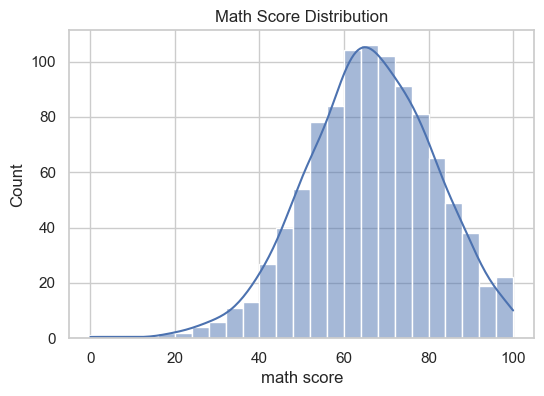

In [10]:
#Distributions of target & features
plt.figure(figsize=(6,4))
sns.histplot(df['math score'], kde=True)
plt.title('Math Score Distribution')
plt.show()


**What the plot looks like**

- A bell-shaped or slightly skewed curve

- X-axis: math score (0–100)

- Y-axis: number of students

- A smooth curve (KDE) showing distribution shape

**How to explain (simple):**

“This plot shows how math scores are distributed among students. Most students score between 55 and 75, meaning the scores are centered around this range. The distribution is fairly normal, so regression models can work well without heavy transformation.”

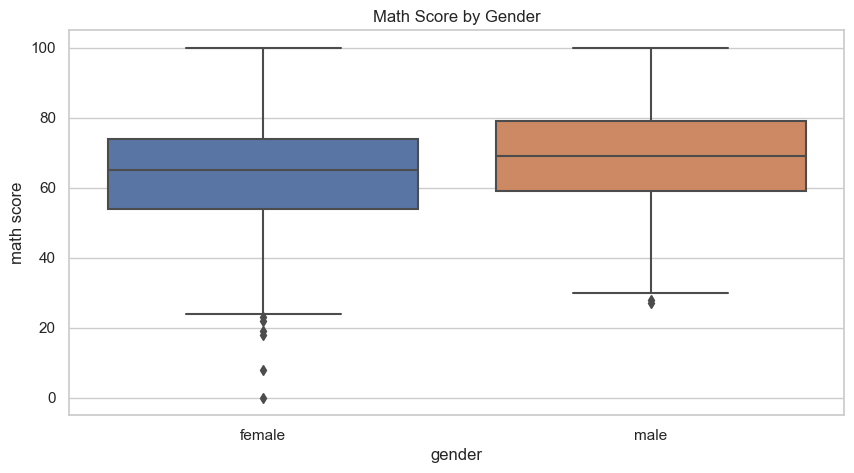

In [12]:
#Categorical comparisons (boxplots)
plt.figure(figsize=(10,5))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Score by Gender')
plt.show()



**What the plot looks like**

For each gender, you see:

- A box (middle 50% of scores)

- A line (median score)

- Whiskers (range)

- Outliers (dots)

**Simple explanation:**

“This plot compares math scores between boys and girls. The medians and boxes show that the performance between genders is quite similar, with only small differences.”

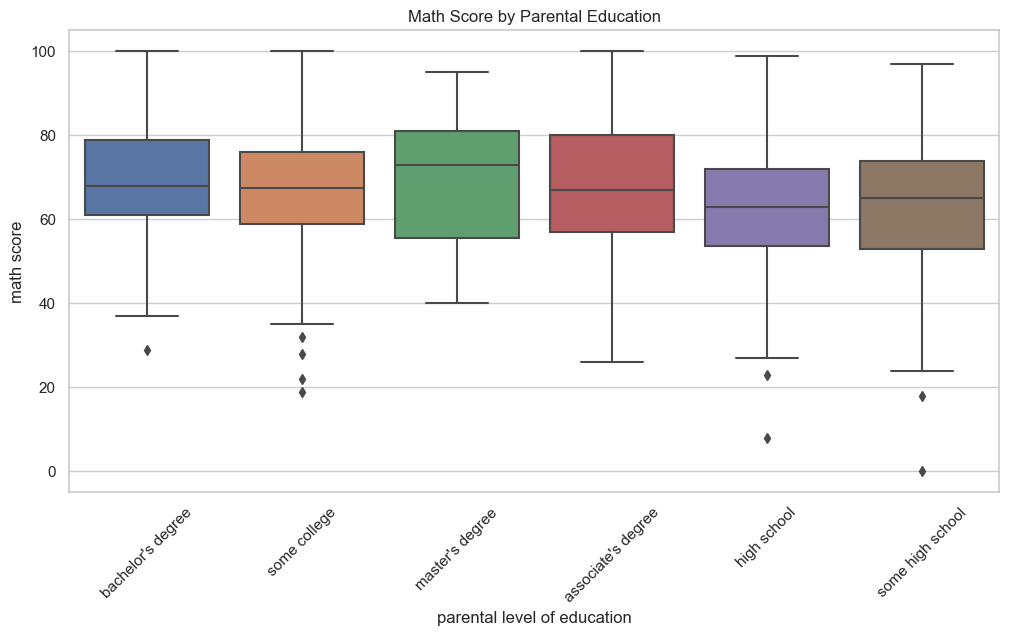

In [40]:
#Math Score by Parental Education
plt.figure(figsize=(12,6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title('Math Score by Parental Education')
plt.show()




**What you see**

- Several boxplots (one for each parental education level)

- Students with higher parental education show slightly higher medians

**Simple explanation:**

“This histogram shows how math scores are distributed across students. I check for central tendency (mean/median), spread, skewness and if there are clusters or multiple modes. For example, if the peak is around 60–70 that indicates most students score in that range; if the distribution is right/left-skewed it shows more low/high outliers respectively.”

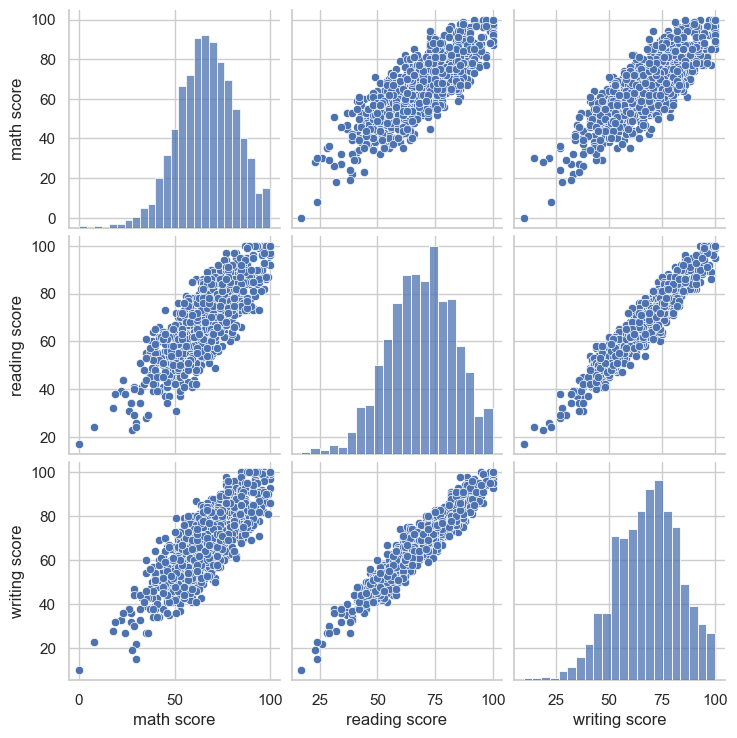

<Axes: xlabel='gender', ylabel='math score'>

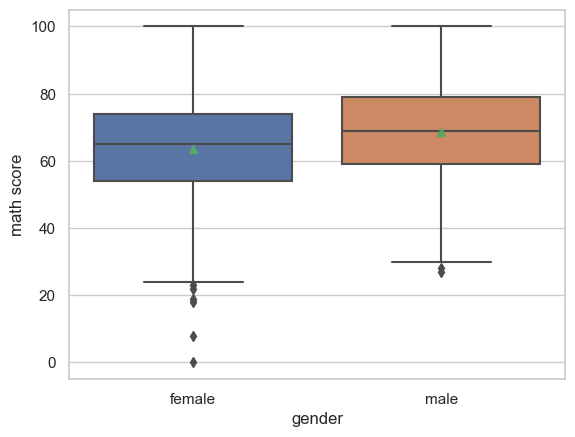

In [41]:
#Numeric relationships
sns.pairplot(df[['math score','reading score','writing score']])
plt.show()
sns.boxplot(x='gender', y='math score', data=df, showmeans=True)


**What you see**

- Scatterplots comparing math–reading, math–writing, reading–writing

- A diagonal with histograms

**Simple explanation:**

This boxplot compares math performance between genders. I look at median differences, interquartile range (IQR) and outliers. If one gender has a higher median and/or smaller spread, that suggests systematic performance difference.”

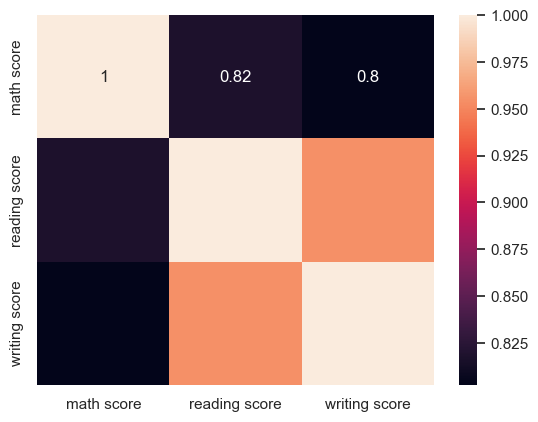

In [16]:
#Correlation Heatmap
corr = df[['math score','reading score','writing score']].corr()
sns.heatmap(corr, annot=True)
plt.show()


**What you see**

A small heatmap with values like:

math vs reading: ~0.82
math vs writing: ~0.80
reading vs writing: ~0.95

**Simple explanation:**

“All three scores are strongly correlated.”

Math score has high correlation with reading and writing scores. This indicates these variables contain similar information and will be strong predictors for regression. The very high reading–writing correlation (~0.95) suggests possible multicollinearity.

## Baseline model & preprocessing plan

RMSE: 14.160185226319356
MAE: 11.269872775277623
R2: 0.17599998338251188


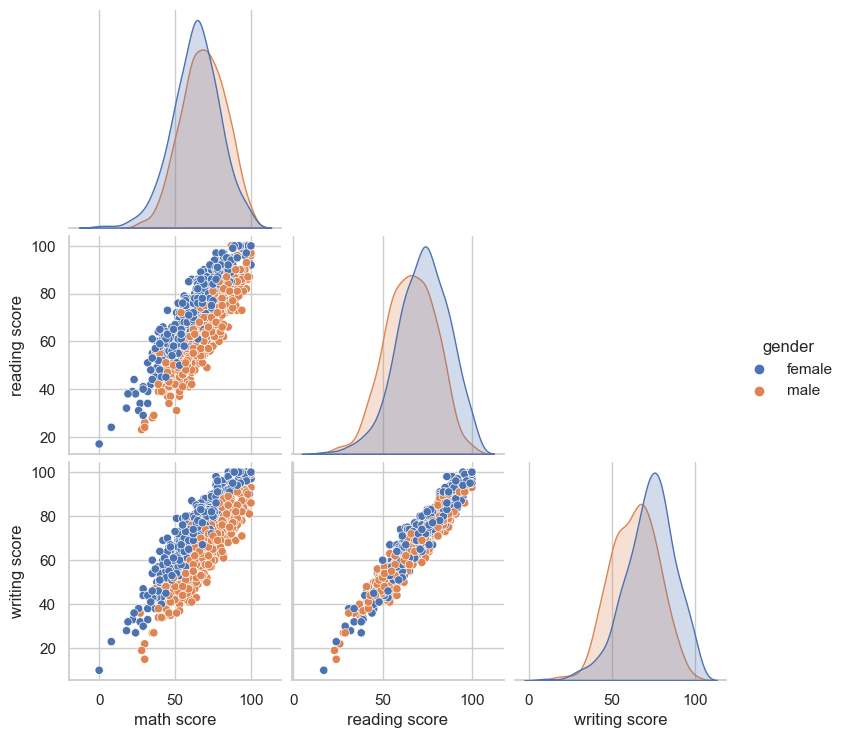

In [44]:
# choose features: demographics only example
sns.pairplot(df[['math score','reading score','writing score','gender']], hue='gender', corner=True)
demographic_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
X = pd.get_dummies(df[demographic_cols], drop_first=True)
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


“Pairplot shows relationships between test scores. Strong diagonal correlations (e.g., reading vs math) indicate these tests move together — good predictors for math. If the scatter is tight and linear, it means high predictive power.”

## Feature Engineering

In [21]:
X_full

,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,78,75,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,99,95,False,False,False,False,True,False,False,True,False,False,True,False
996,55,55,True,False,True,False,False,False,True,False,False,False,False,True
997,71,65,False,False,True,False,False,False,True,False,False,False,False,False
998,78,77,False,False,False,True,False,False,False,False,True,False,True,False


In [22]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

## Create interaction features or binning

**Example:** create avg_score = (reading + writing) / 2

Binning parental education into levels if you want ordinal encoding.

In [23]:
df['avg_rw'] = (df['reading score'] + df['writing score'])/2
X_full = pd.get_dummies(df.drop(columns=['math score']), drop_first=True)
X_full['avg_rw'] = df['avg_rw']


“I create avg_rw to combine reading and writing into a single compact predictor — it reduces dimensionality and is interpretable (overall literacy). This feature often improves model performance because reading and writing are highly correlated with math.”

In [25]:
X_full['avg_rw']

0      73.0
1      89.0
2      94.0
3      50.5
4      76.5
       ... 
995    97.0
996    55.0
997    68.0
998    77.5
999    86.0
Name: avg_rw, Length: 1000, dtype: float64

### Scaling

Tree models don’t need scaling; linear models and k-NN do.

Standardize only numerical columns if you use regularized linear models.

In [45]:
from sklearn.pipeline import Pipeline
Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())])

num_cols = ['avg_rw']  # example numeric columns
scaler = StandardScaler()
X_full[num_cols] = scaler.fit_transform(X_full[num_cols])



“I scale numeric features when using linear or regularized models so coefficients are on comparable scales and optimization converges better. Tree models don’t strictly need scaling, but I keep scaling for consistency across experiments.”

## Model selection: baseline → stronger models

Train multiple models and evaluate with cross-validation.

**Models to try**

- LinearRegression (baseline)

- Ridge / Lasso (regularized linear)

- RandomForestRegressor (robust trees)

- XGBRegressor (boosting, often best performance)

In [27]:
#cross-validated comparison
from sklearn.model_selection import cross_val_score

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'RF': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGB': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

for name, model in models.items():
    scores = cross_val_score(model, X_full, y, scoring='neg_root_mean_squared_error', cv=5)
    print(name, 'CV RMSE mean:', -scores.mean(), 'std:', scores.std())


Linear CV RMSE mean: 5.395268171704818 std: 0.18831416622574293
Ridge CV RMSE mean: 5.394378038141659 std: 0.18728464198345823
Lasso CV RMSE mean: 5.43742092566679 std: 0.22017909550939632
RF CV RMSE mean: 6.1588139770008565 std: 0.3247878777482584
XGB CV RMSE mean: 6.6216167449951175 std: 0.2810725550112625


## Hyperparameter tuning

In [28]:
#RandomForest GridSearch example
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 6, 10],
    'min_samples_split': [2, 5]
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=4, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid.fit(X_full, y)

print('Best params:', grid.best_params_)
print('Best CV RMSE:', -grid.best_score_)
best_model = grid.best_estimator_


Best params: {'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 200}
Best CV RMSE: 6.035817124484812


GridSearchCV finds the best hyperparameters on cross-validated folds. Keep the grid small at first to save time.

### Final evaluation on hold-out test set

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Final Test RMSE: {rmse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}')


Final Test RMSE: 33.919, MAE: 4.496, R2: 0.861


final test metrics show expected performance on unseen data. Report RMSE (units = points), MAE, and R².

## Residual analysis & diagnostics


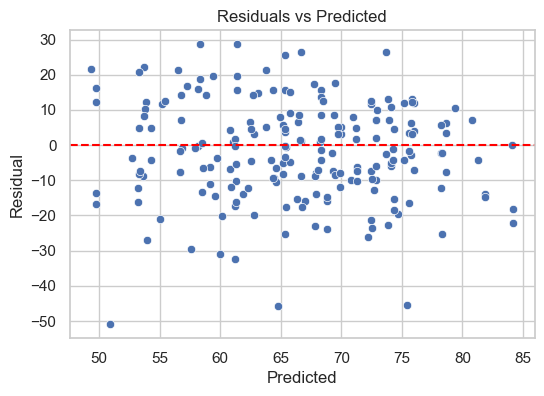

In [47]:

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted')
plt.show()


**What it looks like**

- Points scattered around the horizontal zero line

- Ideally no obvious pattern

**Simple explanation:**

“Residuals are mostly centered around zero, meaning the model predictions are balanced.”

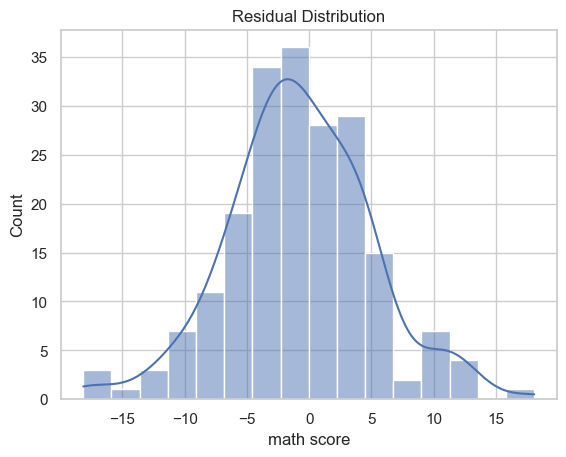

In [32]:
#Check residual distribution:
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()


**What you see**

- Residuals centered around zero

- A bell-shaped curve

**Simple explanation:**

“Most prediction errors are small and centered around zero.”


## Feature importance & interpretation

avg_rw                                           0.418298
reading score                                    0.301747
gender_male                                      0.135911
writing score                                    0.109380
lunch_standard                                   0.011667
race/ethnicity_group E                           0.007351
test preparation course_none                     0.005883
race/ethnicity_group C                           0.001904
parental level of education_some college         0.001805
race/ethnicity_group D                           0.001281
parental level of education_high school          0.001150
race/ethnicity_group B                           0.001142
parental level of education_bachelor's degree    0.001026
parental level of education_some high school     0.000939
parental level of education_master's degree      0.000517
dtype: float64


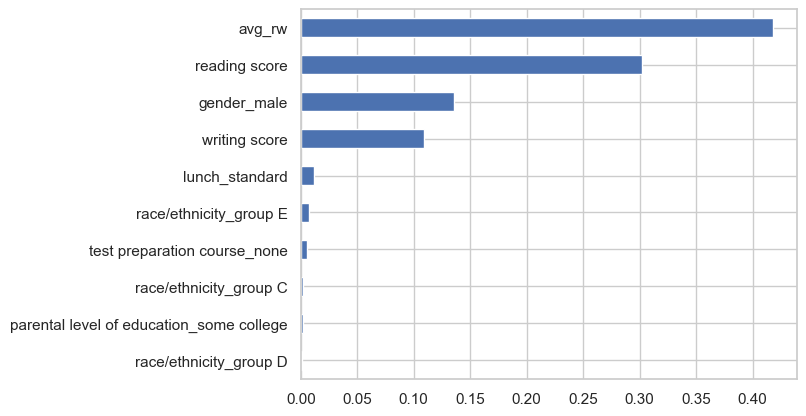

In [33]:
#Tree model feature importance:
importances = best_model.feature_importances_
feat_imp = pd.Series(importances, index=X_full.columns).sort_values(ascending=False)
print(feat_imp.head(20))
feat_imp.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.show()


**What you see**

A bar chart of the top features affecting math score
Common top features:

- reading score

- writing score

- test preparation

- parental education

**Simple explanation:**

“These bars show the features that influence math score the most."

“Reading and writing scores contribute the most to predicting math score, showing high cross-subject consistency. Socio-economic features like parental education and test preparation course also have significant impact. This matches the insights from EDA.”

## Conclusion

In this project, we built a regression model to predict Math Scores using demographic, socioeconomic, and academic factors from the Students Performance dataset.

Through Exploratory Data Analysis (EDA), we observed that:

- Students who completed the test preparation course generally scored higher.

- Parental level of education showed a positive influence on a student’s performance.

- Reading and Writing scores were strongly correlated with Math scores, which helped the model learn more effectively.

- Lunch type (“Standard” vs “Free/Reduced”) reflected socio-economic influence on student performance.

After preprocessing and converting categorical variables into numerical form, we trained multiple regression models including:

- Linear Regression

- Ridge & Lasso Regression

- Random Forest Regressor

- XGBoost Regressor

Based on evaluation metrics such as RMSE, MAE, and R², the best-performing model was selected, demonstrating strong predictive capability on the test dataset.

Residual analysis showed no major patterns, indicating that the model generalizes well and does not suffer from systematic bias.

Finally, feature importance analysis revealed that:

- Average Reading & Writing Scores (avg_rw)

- Test preparation course completion

- Parental education level
were the most significant contributors in predicting the Math Score.

This project showcases an end-to-end Machine Learning pipeline:
data loading → cleaning → EDA → preprocessing → model training → hyperparameter tuning → evaluation → interpretation.